In [1]:
# 필요 모듈 import
from keras.datasets import reuters
from tensorflow import keras
import numpy as np
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers
import copy
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers


from keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
# graph function
def graph():
    plt.figure(figsize = (12,4))
    
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], 'b-', label = 'loss')
    plt.plot(history.history['val_loss'], 'y--', label = 'val_loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], 'g-', label = 'acc')
    plt.plot(history.history['val_accuracy'], 'r--', label = 'val_acc')
    plt.xlabel('Epoch')
    plt.ylim([0.7, 1])
    plt.legend()

    return plt.show()

Loading dataset & Check dataset

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Prepare the data (One-hot encoding)

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [5]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [6]:
# Test data
# Encoding the labels as integer arrays
y_train = np.array(train_labels)
y_test = np.array(test_labels)

## 0. Baseline
- Hidden layer : 2
- Optimizer : rmsprop
- Loss : categorical_crossentropy
- Metrics : accuracy
- Activation : relu
- Learning rate : 0.001
- Epochs : 20
- Batch_size : 512
- Early stopping, check point

#### Result > loss: 1.0355 - accuracy: 0.7903

In [21]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss='categorical_crossentropy',
metrics=['accuracy'])

checkpoint_path = './check.h5'

cp = ModelCheckpoint(filepath=checkpoint_path,
                                save_weights_only=True,
                                save_best_only=True,
                                monitor='val_accuracy',
                                verbose=1)

es = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val),
callbacks=[cp, es])

Epoch 1/20
16/16 [==============================] - 1s 33ms/step - loss: 2.7124 - accuracy: 0.5174 - val_loss: 1.7656 - val_accuracy: 0.6540

Epoch 00001: val_accuracy improved from -inf to 0.65400, saving model to ./check.h5
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.4397 - accuracy: 0.7091 - val_loss: 1.3425 - val_accuracy: 0.7020

Epoch 00002: val_accuracy improved from 0.65400 to 0.70200, saving model to ./check.h5
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.0674 - accuracy: 0.7756 - val_loss: 1.1565 - val_accuracy: 0.7540

Epoch 00003: val_accuracy improved from 0.70200 to 0.75400, saving model to ./check.h5
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.8473 - accuracy: 0.8257 - val_loss: 1.0503 - val_accuracy: 0.7760

Epoch 00004: val_accuracy improved from 0.75400 to 0.77600, saving model to ./check.h5
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6687 - accur

71/71 [==============================] - 0s 4ms/step - loss: 1.0355 - accuracy: 0.7903


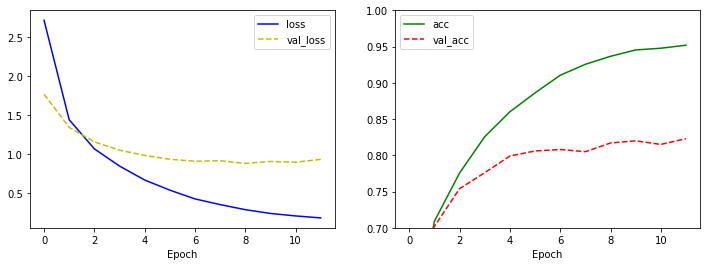

In [22]:
# Result
model.load_weights(checkpoint_path)
results = model.evaluate(x_test, one_hot_test_labels)

graph()

## 1-1. Reduce hidden layer
- Hidden layer : ***1***
- Optimizer : rmsprop
- Loss : categorical_crossentropy
- Metrics : accuracy
- Activation : relu
- Learning rate : 0.001
- Epochs : 20
- Batch_size : 512
- Early stopping, check point

#### Result > loss: 0.9109 - accuracy: 0.8019

In [19]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss='categorical_crossentropy',
metrics=['accuracy'])

checkpoint_path = './check1.h5'

cp = ModelCheckpoint(filepath=checkpoint_path,
                                save_weights_only=True,
                                save_best_only=True,
                                monitor='val_accuracy',
                                verbose=1)

es = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val),
callbacks=[cp, es])

Epoch 1/20
16/16 [==============================] - 1s 50ms/step - loss: 2.5394 - accuracy: 0.5529 - val_loss: 1.7899 - val_accuracy: 0.6550

Epoch 00001: val_accuracy improved from -inf to 0.65500, saving model to ./check1.h5
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.4463 - accuracy: 0.7191 - val_loss: 1.3346 - val_accuracy: 0.7210

Epoch 00002: val_accuracy improved from 0.65500 to 0.72100, saving model to ./check1.h5
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.0567 - accuracy: 0.7853 - val_loss: 1.1349 - val_accuracy: 0.7740

Epoch 00003: val_accuracy improved from 0.72100 to 0.77400, saving model to ./check1.h5
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.8264 - accuracy: 0.8297 - val_loss: 1.0216 - val_accuracy: 0.7930

Epoch 00004: val_accuracy improved from 0.77400 to 0.79300, saving model to ./check1.h5
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6647 - a

71/71 [==============================] - 0s 4ms/step - loss: 0.9109 - accuracy: 0.8019


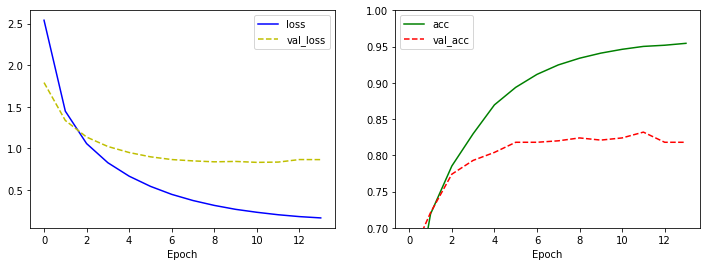

In [20]:
model.load_weights('./check1.h5')
results = model.evaluate(x_test, one_hot_test_labels)

graph()

## 1-2. Add hidden layer
- Hidden layer : ***5***
- Optimizer : rmsprop
- Loss : binary_crossentropy
- Metrics : accuracy
- Activation : relu
- Learning rate : 0.001
- Epochs : 20
- Batch_size : 512
- Early stopping, check point

#### Result > loss: 1.1738 - accuracy: 0.7680

In [23]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss='categorical_crossentropy',
metrics=['accuracy'])

cp = ModelCheckpoint(filepath='./check1.h5',
                                save_weights_only=True,
                                save_best_only=True,
                                monitor='val_accuracy',
                                verbose=1)

es = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val),
callbacks=[cp, es])

Epoch 1/20
16/16 [==============================] - 1s 33ms/step - loss: 2.7696 - accuracy: 0.4164 - val_loss: 1.7954 - val_accuracy: 0.5930

Epoch 00001: val_accuracy improved from -inf to 0.59300, saving model to ./check1.h5
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.5717 - accuracy: 0.6339 - val_loss: 1.4512 - val_accuracy: 0.6550

Epoch 00002: val_accuracy improved from 0.59300 to 0.65500, saving model to ./check1.h5
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.1972 - accuracy: 0.7301 - val_loss: 1.2794 - val_accuracy: 0.7070

Epoch 00003: val_accuracy improved from 0.65500 to 0.70700, saving model to ./check1.h5
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.9578 - accuracy: 0.7846 - val_loss: 1.1462 - val_accuracy: 0.7510

Epoch 00004: val_accuracy improved from 0.70700 to 0.75100, saving model to ./check1.h5
Epoch 5/20
16/16 [==============================] - 0s 18ms/step - loss: 0.7834 - a

71/71 [==============================] - 0s 4ms/step - loss: 1.1738 - accuracy: 0.7680


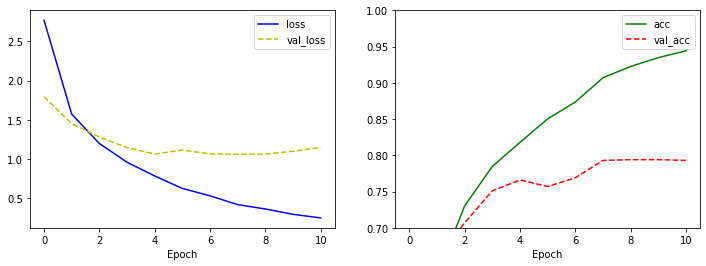

In [24]:
model.load_weights('./check1.h5')
results = model.evaluate(x_test, one_hot_test_labels)

graph()

## 1-3. Add hidden layer + Change hidden units
- Hidden layer : ***5 + Change hidden units***
- Optimizer : rmsprop
- Loss : binary_crossentropy
- Metrics : accuracy
- Activation : relu
- Learning rate : 0.001
- Epochs : 20
- Batch_size : 512
- Early stopping, check point

#### Result > loss: 1.2032 - accuracy: 0.8054

In [25]:
model = models.Sequential()
model.add(layers.Dense(5000, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss='categorical_crossentropy',
metrics=['accuracy'])

cp = ModelCheckpoint(filepath='./check2.h5',
                                save_weights_only=True,
                                save_best_only=True,
                                monitor='val_accuracy',
                                verbose=1)

es = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val),
callbacks=[cp, es])

Epoch 1/20
16/16 [==============================] - 3s 119ms/step - loss: 2.3425 - accuracy: 0.4565 - val_loss: 1.5701 - val_accuracy: 0.6670

Epoch 00001: val_accuracy improved from -inf to 0.66700, saving model to ./check2.h5
Epoch 2/20
16/16 [==============================] - 1s 94ms/step - loss: 1.1890 - accuracy: 0.7167 - val_loss: 1.4483 - val_accuracy: 0.6500

Epoch 00002: val_accuracy did not improve from 0.66700
Epoch 3/20
16/16 [==============================] - 1s 94ms/step - loss: 0.7686 - accuracy: 0.8171 - val_loss: 0.9547 - val_accuracy: 0.7870

Epoch 00003: val_accuracy improved from 0.66700 to 0.78700, saving model to ./check2.h5
Epoch 4/20
16/16 [==============================] - 2s 94ms/step - loss: 0.6683 - accuracy: 0.8463 - val_loss: 0.9276 - val_accuracy: 0.8200

Epoch 00004: val_accuracy improved from 0.78700 to 0.82000, saving model to ./check2.h5
Epoch 5/20
16/16 [==============================] - 1s 94ms/step - loss: 0.2699 - accuracy: 0.9339 - val_loss: 1.01

71/71 [==============================] - 1s 8ms/step - loss: 1.2032 - accuracy: 0.8054


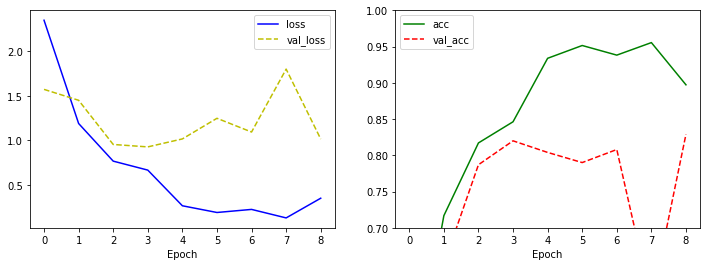

In [26]:
model.load_weights('./check2.h5')
results = model.evaluate(x_test, one_hot_test_labels)

graph()

## 2. Change optimizer
- Hidden layer : 2
- Optimizer : ***adam***
- Loss : binary_crossentropy
- Metrics : accuracy
- Activation : relu
- Learning rate : 0.001
- Epochs : 20
- Batch_size : 512
- Early stopping, check point

#### Result > loss: 1.0572 - accuracy: 0.7898


In [33]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
loss='categorical_crossentropy',
metrics=['accuracy'])

checkpoint_path = './check4.h5'

cp = ModelCheckpoint(filepath=checkpoint_path,
                                save_weights_only=True,
                                save_best_only=True,
                                monitor='val_accuracy',
                                verbose=1)

es = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(partial_x_train,
partial_y_train,
epochs=100,
batch_size=512,
validation_data=(x_val, y_val),
callbacks=[cp, es])

Epoch 1/100
16/16 [==============================] - 1s 32ms/step - loss: 3.4140 - accuracy: 0.3852 - val_loss: 2.6965 - val_accuracy: 0.5350

Epoch 00001: val_accuracy improved from -inf to 0.53500, saving model to ./check4.h5
Epoch 2/100
16/16 [==============================] - 0s 17ms/step - loss: 2.1184 - accuracy: 0.5960 - val_loss: 1.6805 - val_accuracy: 0.6520

Epoch 00002: val_accuracy improved from 0.53500 to 0.65200, saving model to ./check4.h5
Epoch 3/100
16/16 [==============================] - 0s 16ms/step - loss: 1.3871 - accuracy: 0.7045 - val_loss: 1.3316 - val_accuracy: 0.7000

Epoch 00003: val_accuracy improved from 0.65200 to 0.70000, saving model to ./check4.h5
Epoch 4/100
16/16 [==============================] - 0s 16ms/step - loss: 1.0590 - accuracy: 0.7675 - val_loss: 1.1568 - val_accuracy: 0.7500

Epoch 00004: val_accuracy improved from 0.70000 to 0.75000, saving model to ./check4.h5
Epoch 5/100
16/16 [==============================] - 0s 16ms/step - loss: 0.836

71/71 [==============================] - 0s 4ms/step - loss: 1.0572 - accuracy: 0.7898


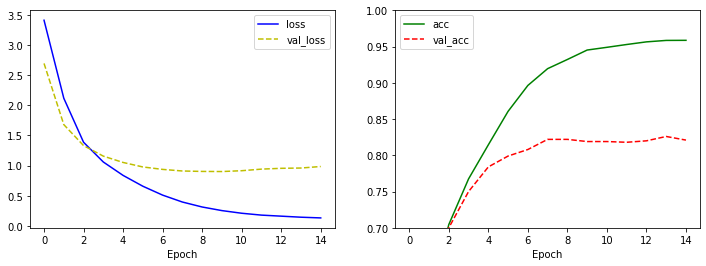

In [34]:
model.load_weights('./check4.h5')
results = model.evaluate(x_test, one_hot_test_labels)

graph()

## 3. Change learning rate
- Hidden layer : 2
- Optimizer : RMSprop
- Loss : binary_crossentropy
- Metrics : accuracy
- Activation : relu
- Learning rate : ***0.0001***
- Epochs : 20
- Batch_size : 512
- Early stopping, check point

#### Result > oss: 0.9743 - accuracy: 0.7854


In [37]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
loss='categorical_crossentropy',
metrics=['accuracy'])

checkpoint_path = './check5.h5'

cp = ModelCheckpoint(filepath=checkpoint_path,
                                save_weights_only=True,
                                save_best_only=True,
                                monitor='val_accuracy',
                                verbose=1)

es = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(partial_x_train,
partial_y_train,
epochs=100,
batch_size=512,
validation_data=(x_val, y_val),
callbacks=[cp, es])

Epoch 1/100
16/16 [==============================] - 1s 32ms/step - loss: 3.7868 - accuracy: 0.1041 - val_loss: 3.7410 - val_accuracy: 0.2660

Epoch 00001: val_accuracy improved from -inf to 0.26600, saving model to ./check5.h5
Epoch 2/100
16/16 [==============================] - 0s 15ms/step - loss: 3.6937 - accuracy: 0.3960 - val_loss: 3.6345 - val_accuracy: 0.4830

Epoch 00002: val_accuracy improved from 0.26600 to 0.48300, saving model to ./check5.h5
Epoch 3/100
16/16 [==============================] - 0s 15ms/step - loss: 3.5676 - accuracy: 0.4806 - val_loss: 3.4955 - val_accuracy: 0.4930

Epoch 00003: val_accuracy improved from 0.48300 to 0.49300, saving model to ./check5.h5
Epoch 4/100
16/16 [==============================] - 0s 16ms/step - loss: 3.4079 - accuracy: 0.4910 - val_loss: 3.3251 - val_accuracy: 0.5090

Epoch 00004: val_accuracy improved from 0.49300 to 0.50900, saving model to ./check5.h5
Epoch 5/100
16/16 [==============================] - 0s 17ms/step - loss: 3.215

71/71 [==============================] - 0s 4ms/step - loss: 0.9743 - accuracy: 0.7854


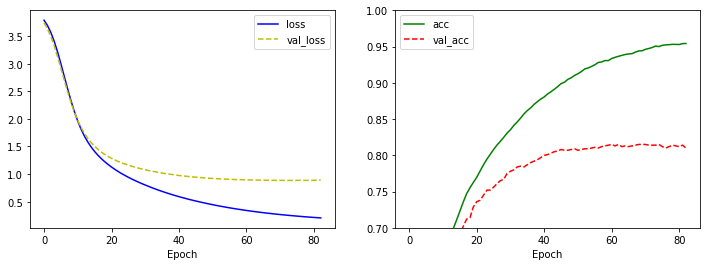

In [38]:
model.load_weights('./check5.h5')
results = model.evaluate(x_test, one_hot_test_labels)

graph()

## 4. Change activation function
- Hidden layer : 2
- Optimizer : RMSprop
- Loss : binary_crossentropy
- Metrics : accuracy
- Activation : ***tanh***
- Learning rate : 0.001
- Epochs : 20
- Batch_size : 512
- Early stopping, check point

#### Result > loss: 0.9161 - accuracy: 0.7961


In [42]:
model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss='categorical_crossentropy',
metrics=['accuracy'])

checkpoint_path = './check6.h5'

cp = ModelCheckpoint(filepath=checkpoint_path,
                                save_weights_only=True,
                                save_best_only=True,
                                monitor='val_accuracy',
                                verbose=1)

es = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val),
callbacks=[cp, es])

Epoch 1/20
16/16 [==============================] - 1s 33ms/step - loss: 2.3029 - accuracy: 0.5467 - val_loss: 1.5995 - val_accuracy: 0.6440

Epoch 00001: val_accuracy improved from -inf to 0.64400, saving model to ./check6.h5
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.3293 - accuracy: 0.7159 - val_loss: 1.2290 - val_accuracy: 0.7340

Epoch 00002: val_accuracy improved from 0.64400 to 0.73400, saving model to ./check6.h5
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 0.9858 - accuracy: 0.7990 - val_loss: 1.0472 - val_accuracy: 0.7830

Epoch 00003: val_accuracy improved from 0.73400 to 0.78300, saving model to ./check6.h5
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.7595 - accuracy: 0.8598 - val_loss: 0.9391 - val_accuracy: 0.8060

Epoch 00004: val_accuracy improved from 0.78300 to 0.80600, saving model to ./check6.h5
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5919 - a

71/71 [==============================] - 0s 4ms/step - loss: 0.9161 - accuracy: 0.7961


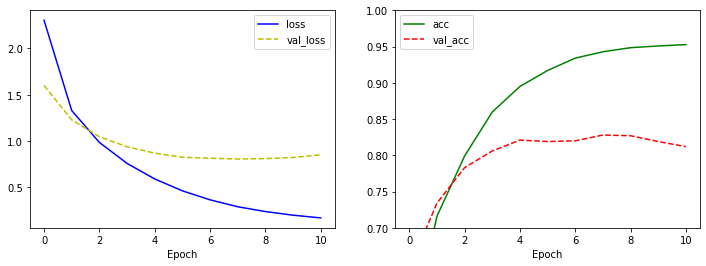

In [43]:
# Result
model.load_weights(checkpoint_path)
results = model.evaluate(x_test, one_hot_test_labels)

graph()

## 5. Change batch_size
- Hidden layer : 2
- Optimizer : RMSprop
- Loss : binary_crossentropy
- Metrics : accuracy
- Activation : relu
- Learning rate : 0.001
- Epochs : 20
- Batch_size : ***125***
- Early stopping, check point

#### Result > loss: 0.9571 - accuracy: 0.7992


In [44]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss='categorical_crossentropy',
metrics=['accuracy'])

checkpoint_path = './check.h5'

cp = ModelCheckpoint(filepath=checkpoint_path,
                                save_weights_only=True,
                                save_best_only=True,
                                monitor='val_accuracy',
                                verbose=1)

es = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=125,
validation_data=(x_val, y_val),
callbacks=[cp, es])

Epoch 1/20
64/64 [==============================] - 1s 11ms/step - loss: 1.7772 - accuracy: 0.6344 - val_loss: 1.2003 - val_accuracy: 0.7330

Epoch 00001: val_accuracy improved from -inf to 0.73300, saving model to ./check.h5
Epoch 2/20
64/64 [==============================] - 0s 7ms/step - loss: 0.9175 - accuracy: 0.8011 - val_loss: 1.0000 - val_accuracy: 0.7960

Epoch 00002: val_accuracy improved from 0.73300 to 0.79600, saving model to ./check.h5
Epoch 3/20
64/64 [==============================] - 0s 7ms/step - loss: 0.6229 - accuracy: 0.8680 - val_loss: 0.9396 - val_accuracy: 0.8090

Epoch 00003: val_accuracy improved from 0.79600 to 0.80900, saving model to ./check.h5
Epoch 4/20
64/64 [==============================] - 0s 8ms/step - loss: 0.4322 - accuracy: 0.9093 - val_loss: 0.9059 - val_accuracy: 0.8160

Epoch 00004: val_accuracy improved from 0.80900 to 0.81600, saving model to ./check.h5
Epoch 5/20
64/64 [==============================] - 0s 8ms/step - loss: 0.3132 - accuracy:

71/71 [==============================] - 0s 4ms/step - loss: 0.9571 - accuracy: 0.7992


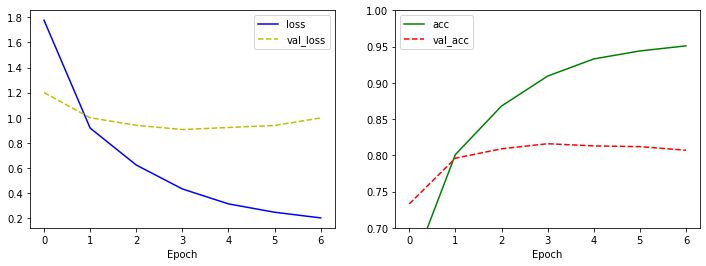

In [45]:
# Result
model.load_weights(checkpoint_path)
results = model.evaluate(x_test, one_hot_test_labels)

graph()

## 6. Final
- Hidden layer : ***5 + Change hidden units***
- Optimizer : RMSprop
- Loss : binary_crossentropy
- Metrics : accuracy
- Activation : ***tanh***
- Learning rate : ***0.0001***
- Epochs : 20
- Batch_size : ***125***
- Early stopping, check point

#### Result > loss: 0.8952 - accuracy: 0.8081


In [52]:
model = models.Sequential()
model.add(layers.Dense(5000, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1000, activation='tanh'))
model.add(layers.Dense(500, activation='tanh'))
model.add(layers.Dense(100, activation='tanh'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001),
loss='categorical_crossentropy',
metrics=['accuracy'])

checkpoint_path = './check.h5'

cp = ModelCheckpoint(filepath=checkpoint_path,
                                save_weights_only=True,
                                save_best_only=True,
                                monitor='val_accuracy',
                                verbose=1)

es = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=125,
validation_data=(x_val, y_val),
callbacks=[cp, es])

Epoch 1/20
64/64 [==============================] - 5s 60ms/step - loss: 1.3261 - accuracy: 0.7086 - val_loss: 0.9480 - val_accuracy: 0.7970

Epoch 00001: val_accuracy improved from -inf to 0.79700, saving model to ./check.h5
Epoch 2/20
64/64 [==============================] - 4s 57ms/step - loss: 0.6329 - accuracy: 0.8742 - val_loss: 0.8413 - val_accuracy: 0.8220

Epoch 00002: val_accuracy improved from 0.79700 to 0.82200, saving model to ./check.h5
Epoch 3/20
64/64 [==============================] - 4s 58ms/step - loss: 0.3861 - accuracy: 0.9246 - val_loss: 0.7897 - val_accuracy: 0.8350

Epoch 00003: val_accuracy improved from 0.82200 to 0.83500, saving model to ./check.h5
Epoch 4/20
64/64 [==============================] - 4s 58ms/step - loss: 0.2666 - accuracy: 0.9434 - val_loss: 0.8358 - val_accuracy: 0.8150

Epoch 00004: val_accuracy did not improve from 0.83500
Epoch 5/20
64/64 [==============================] - 4s 57ms/step - loss: 0.2044 - accuracy: 0.9504 - val_loss: 0.8462 -

71/71 [==============================] - 1s 10ms/step - loss: 0.8952 - accuracy: 0.8081


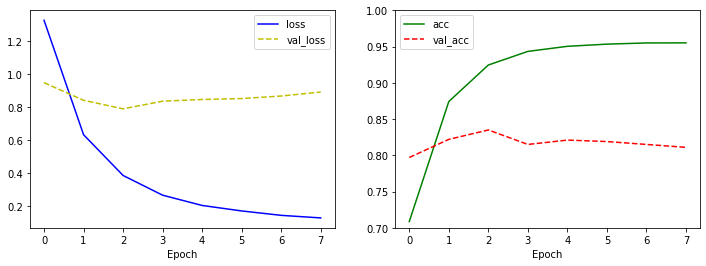

In [53]:
# Result
model.load_weights(checkpoint_path)
results = model.evaluate(x_test, one_hot_test_labels)

graph()